In [185]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# read data from file
filePath = 'medical_examination.csv'
df = pd.read_csv(filePath)
df.head()
    

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [186]:
# DETERMINE OVERWEIGHT STATUS

# make function to determine if patient is overweight
def overweight(row):
    weight = row['weight']
    height = row['height']
    # convert height to meters
    height = height / 100
    # calculate BMI
    BMI = weight / (height ** 2)
    # determine if patient is overweight
    if(BMI > 25):
        return 1
    else:
        return 0

# add overweight column to data
df['overweight'] = df.apply(lambda row: overweight(row), axis = 1)
# df.head(12)

In [187]:
# NORMALIZE DATA

# if cholesterol or gluc = 1, make it 0
df.loc[df.gluc == 1, "gluc"] = 0
df.loc[df.cholesterol == 1, "cholesterol"] = 0

# if cholesterol or gluc > 1, make it 1
df.loc[df.gluc > 1, "gluc"] = 1
df.loc[df.cholesterol > 1, "cholesterol"] = 1

# df.head(12)


In [188]:
# slice dataframe to select columns rightward from cholesterol 
df_slice = df.iloc[:, df.columns.get_loc("cholesterol"):]
# convert data into long format with cardio as pivot
df_long_format = pd.melt(df_slice, id_vars=['cardio'])
df_long_format = df_long_format.sort_values(by = 'variable')
# print(df_long_format)

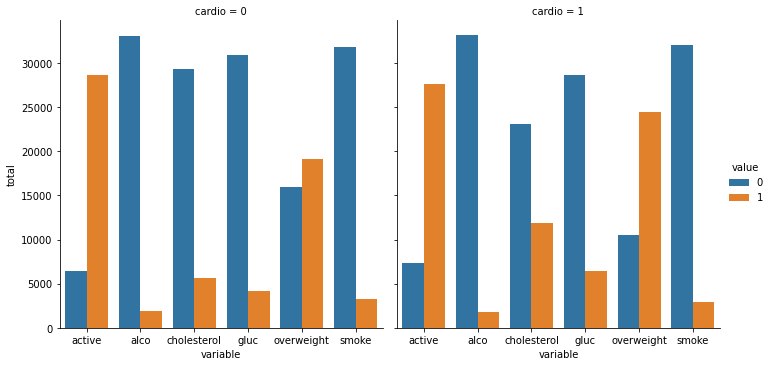

In [189]:
# plot data with seaborn, use cardio as chart-splitter
medDataPlt = sns.catplot(data=df_long_format, x="variable", hue="value", col="cardio", kind="count")
medDataPlt.set_axis_labels("variable", "total")

In [190]:
# CLEAN DATA

# remove patients with diastolic pressure higher than systolic
clean_df = df[df['ap_lo'] <= df['ap_hi']]
# print(clean_df.shape)

# remove patients with height less than the 2.5th percentile
clean_df = clean_df[clean_df['height'] >= clean_df['height'].quantile(0.025)]
# print(clean_df.shape)

# remove patients with height more than the 97.5th percentile
clean_df = clean_df[clean_df['height'] <= clean_df['height'].quantile(0.975)]
# print(clean_df.shape)

# remove patients with weight less than the 2.5th percentile
clean_df = clean_df[clean_df['weight'] >= clean_df['weight'].quantile(0.025)]
# print(clean_df.shape)

# remove patients with weight more than the 97.5th percentile
clean_df = clean_df[clean_df['weight'] <= clean_df['weight'].quantile(0.975)]
# print(clean_df.shape)

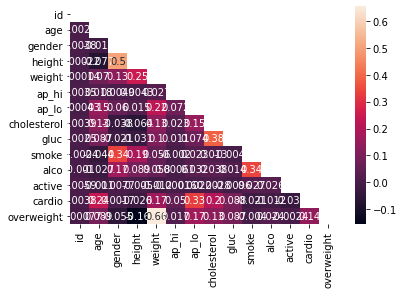

In [191]:
# PLOT CORRELATION MATRIX OF CLEAN DATA WITH HEATMAP

clean_df = clean_df.fillna(method="ffill")

# create correlation matrix
corrMatrix = clean_df.corr()
# print(corrMatrix)

# create upper triangle mask
mask = np.triu(np.ones_like(corrMatrix))

# plot correlation matrix with heatmap()
sns.heatmap(corrMatrix, mask=mask)
plt.show()